# 🗺️ MeshA* Algorithm Analysis Playground

This notebook allows for interactive testing, visualization, and comparison of the **MeshA\*** algorithm against the baseline **Lattice-Based A\* (LBA\*)**.

**Workflow:**
1.  Define the problem instance (Map, Start, Goal).
2.  The notebook compiles the C++ backend (`make mesh_astar`).
3.  It executes the planner in `single` mode.
4.  Results are parsed and visualized using Python (`matplotlib`).

**Note on Heuristic Weight ($w$):**
* **$w=1.0$ (Optimality):** Both LBA* and MeshA* typically find the optimal path. Visual differences are minimal.
* **$w > 1.0$ (Sub-optimality):** This is where the behavior diverges. MeshA* leverages the mesh abstraction to speed up search, potentially yielding different trajectories compared to LBA*.

In [7]:
# IPython magic commands to automatically reload imported modules.
# If you modify code in external files (e.g., KC_graphics.py or wrapper.py),
# these changes will be instantly reflected in the notebook without restarting the kernel.
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
import sys

# Importing wrapper functions
from wrapper import compile_and_run, parse_and_visualize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# === Global Configuration ===
# Ensure these files exist in your project root
MAP_MOSCOW    = "maps/Moscow_0_512.map"
MAP_LABYRINTH = "maps/Labyrinth.map"
MAP_MY        = "maps/my_map.map"

PRIM_FILE = "data/base_control_set.txt"
MESH_FILE = "data/base_mesh_info.txt"

# Create output directory if not exists
os.makedirs("../../res", exist_ok=True)

## Single Run (Detailed View, $w=1.0$)

🔨 Building C++ project...
🚀 Running planner...
Opening result: ../../res/nb_case1_result_LBAstar.txt


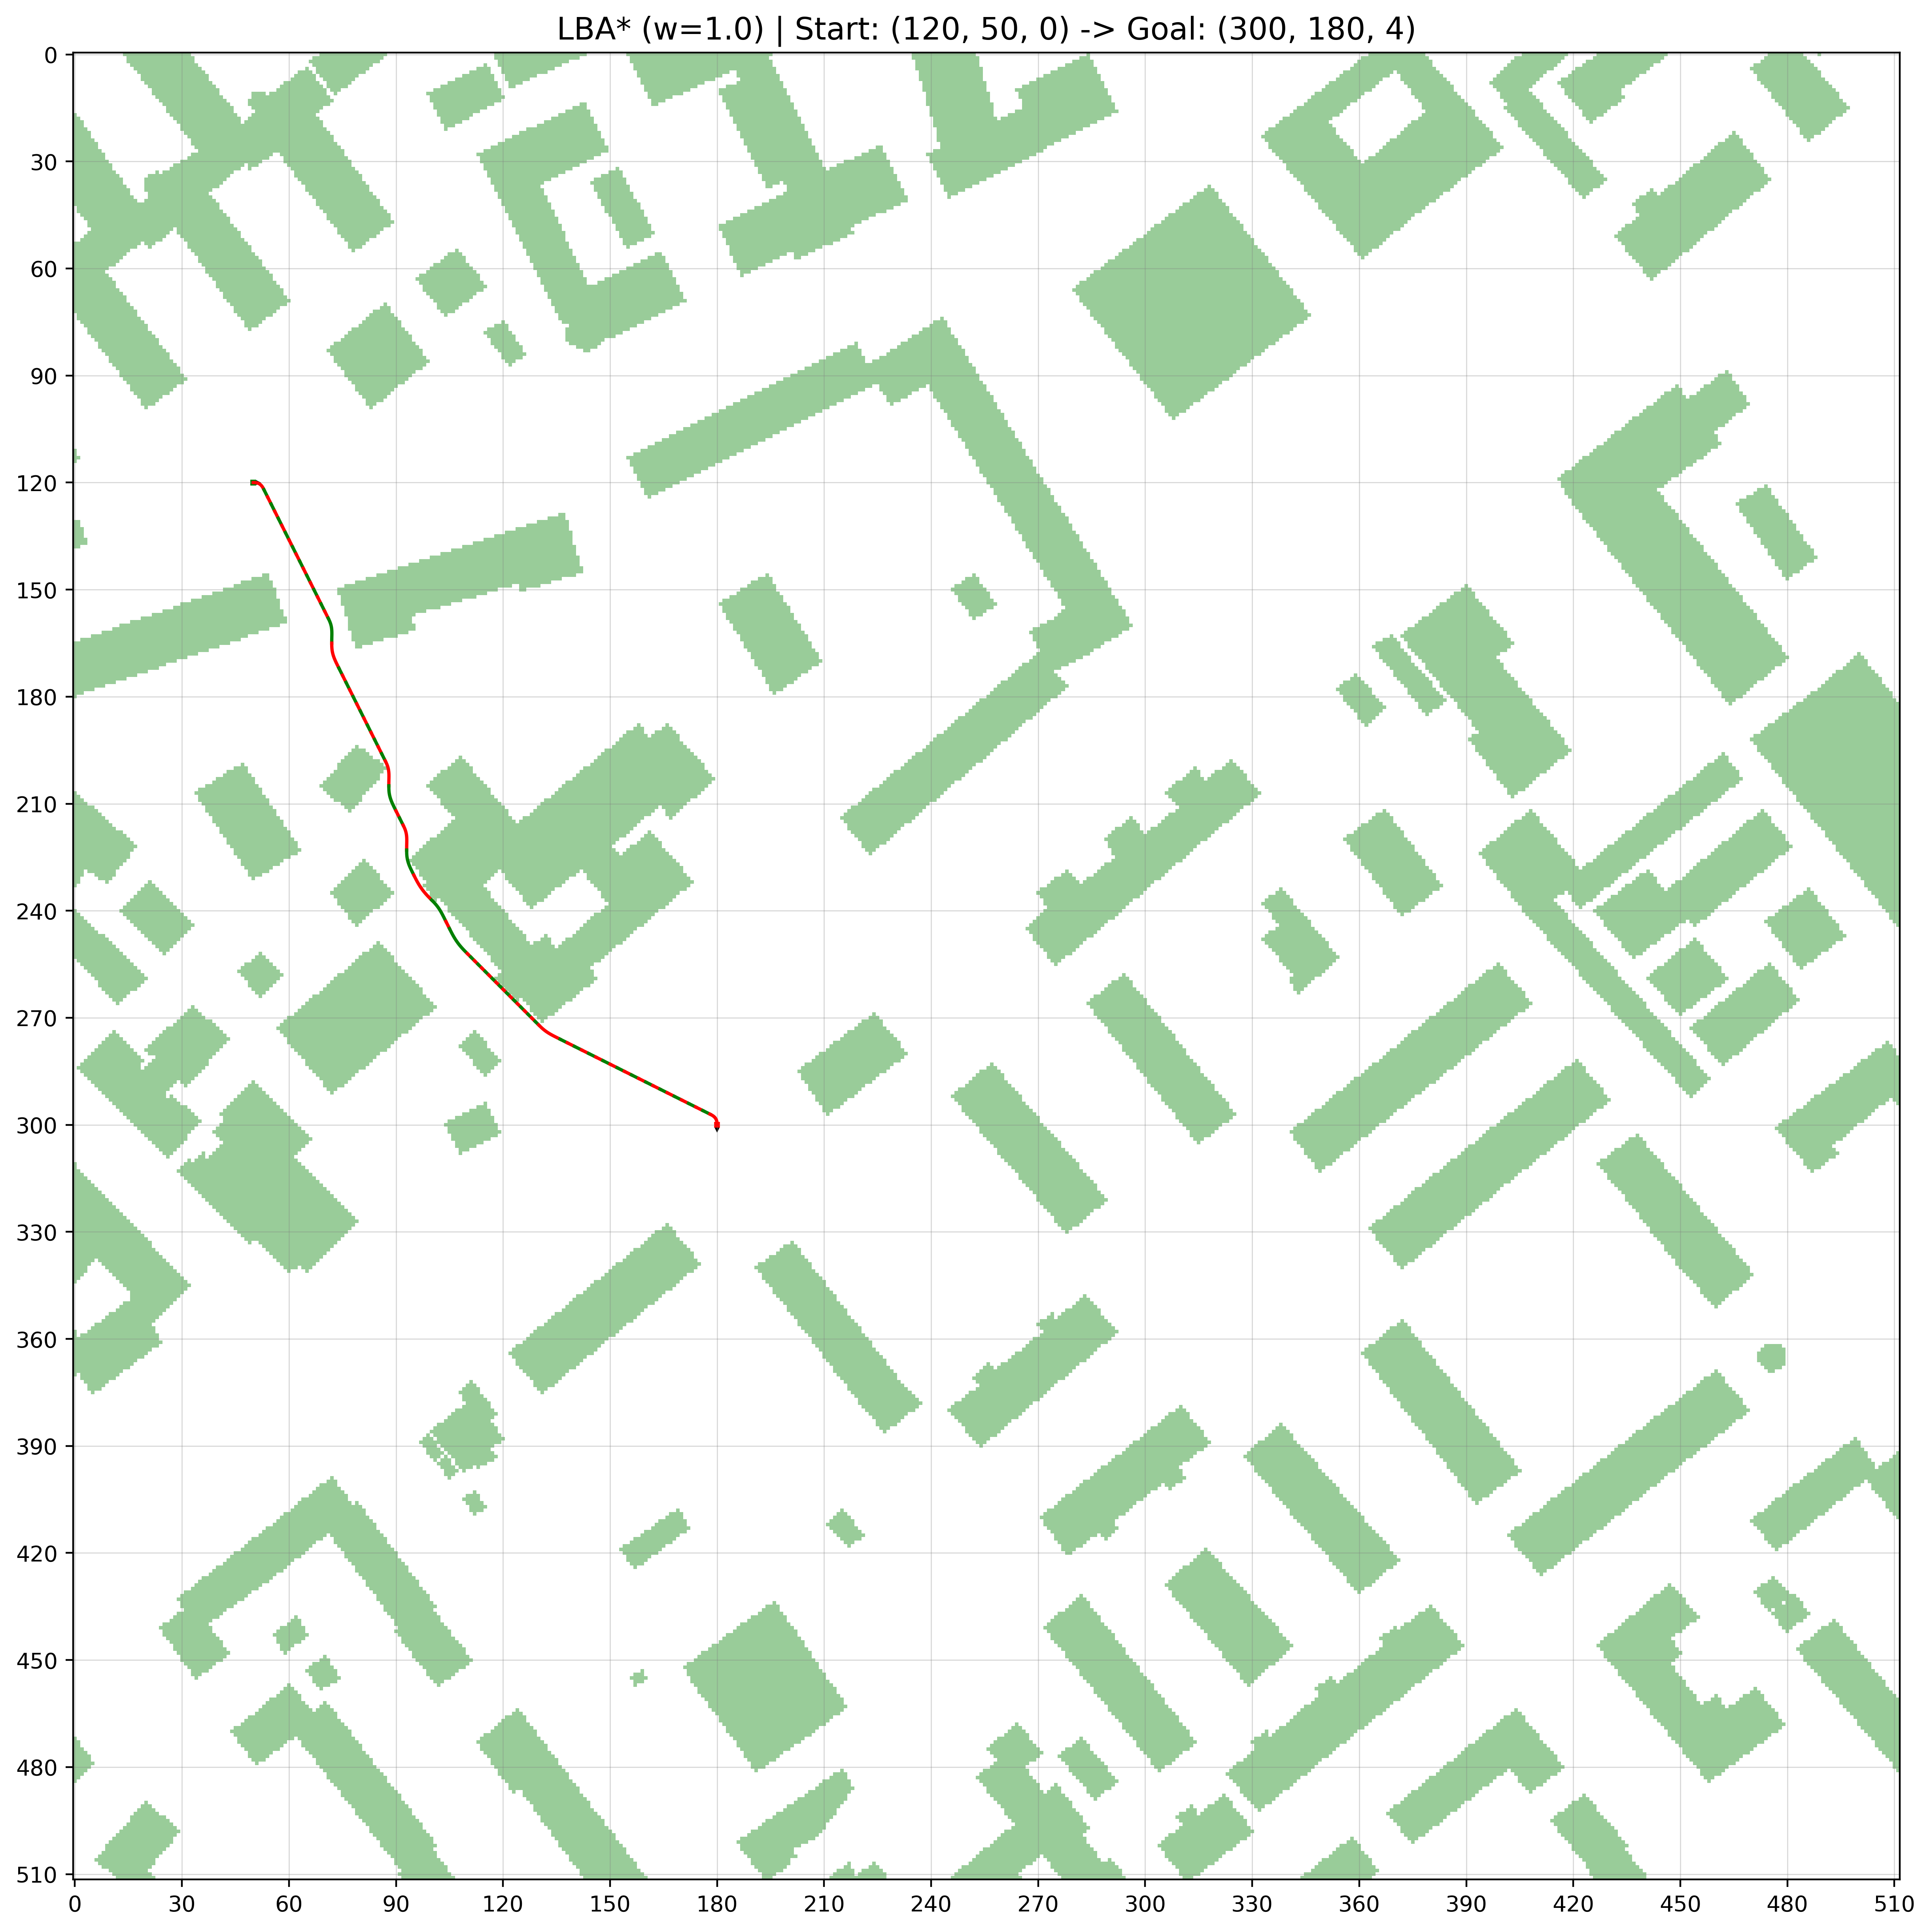

In [3]:
# === Case 1: Default LBA* on Moscow Map ===

START = (120, 50, 0)
GOAL  = (300, 180, 4)

# 1. Run C++ Planner
results = compile_and_run(
    map_file=MAP_MOSCOW, 
    prim_file=PRIM_FILE, 
    mesh_file=MESH_FILE,
    start=START, 
    goal=GOAL,
    out_prefix="res/nb_case1_",
    weight=1.0
)

# 2. Visualize
if "LBA*" in results:
    print(f"Opening result: {results['LBA*']}")
    
    # Large figure for detailed inspection
    fig, ax = plt.subplots(figsize=(15, 15), dpi=400)
    parse_and_visualize(
        result_file=results["LBA*"], 
        prim_file_path=PRIM_FILE, 
        ax=ax 
    )

    ax.set_title(f"LBA* (w=1.0) | Start: {START} -> Goal: {GOAL}", fontsize=14)
    # plt.savefig("../../images/example_LBAstar_Moscow.png", transparent=False, bbox_inches="tight", facecolor='white')
    plt.show()
else:
    print("❌ Result for LBA* not found.")

## Multiple Scenarios (2x2 Grid)

🔨 Building C++ project...
🚀 Running planner...
🔨 Building C++ project...
🚀 Running planner...
🔨 Building C++ project...
🚀 Running planner...
🔨 Building C++ project...
🚀 Running planner...


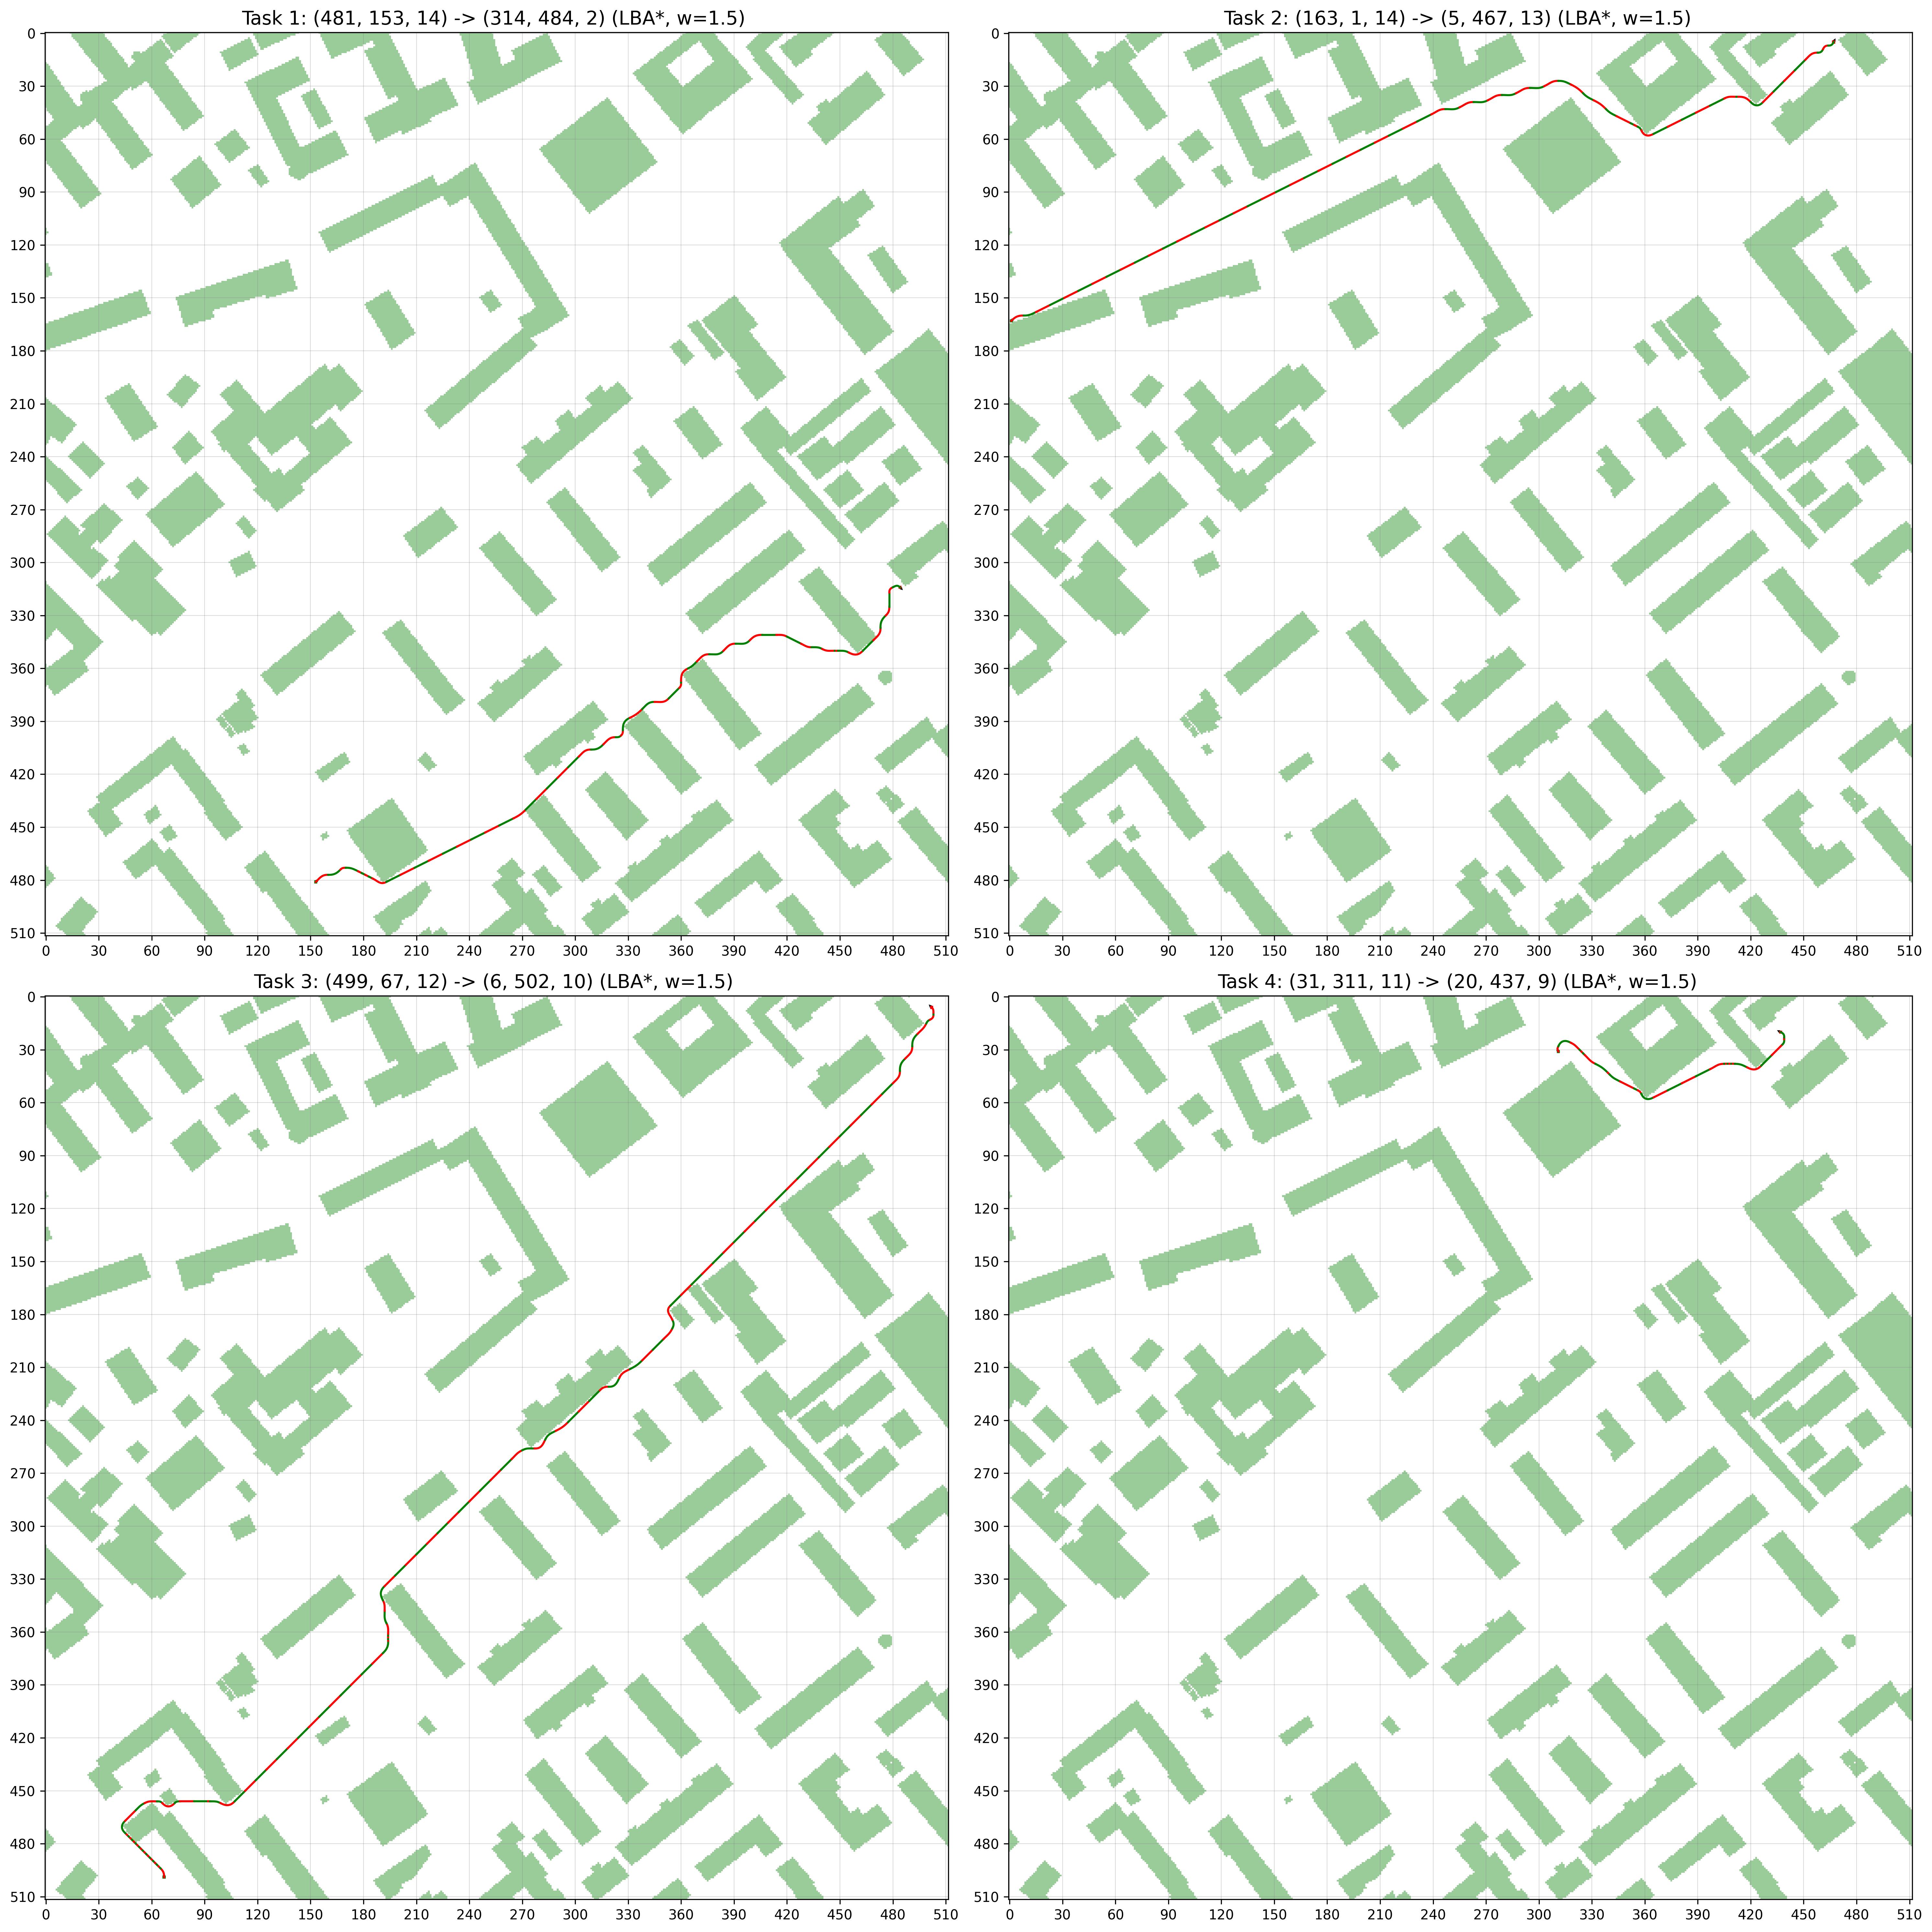

In [4]:
# === Case 2: Various Start/Goal Configurations ===
# Running 4 different short tasks on Moscow map with w=1.5 (for speed)

tasks = [
    {"s": (481, 153, 14), "g": (314, 484, 2)},
    {"s": (163, 1, 14), "g": (5, 467, 13)},
    {"s": (499, 67, 12), "g": (6, 502, 10)},
    {"s": (31, 311, 11),  "g": (20, 437, 9)}
]

fig, axes = plt.subplots(2, 2, figsize=(20, 20), dpi=300)
axes = axes.flatten()

for i, task in enumerate(tasks):
    # Run planner for each task
    prefix = f"res/nb_case2_task{i}_"
    res = compile_and_run(
        map_file=MAP_MOSCOW, prim_file=PRIM_FILE, mesh_file=MESH_FILE,
        start=task["s"], goal=task["g"], out_prefix=prefix, weight=1.5
    )
    
    if "LBA*" in res:
        parse_and_visualize(res["LBA*"], PRIM_FILE, ax=axes[i])
        axes[i].set_title(f"Task {i+1}: {task["s"]} -> {task["g"]} (LBA*, w=1.5) ", fontsize=14)
    else:
        axes[i].text(0.5, 0.5, "Failed", ha='center')

plt.tight_layout()
# plt.savefig("../../images/example_LBAstar_4_4.png", transparent=False, bbox_inches="tight", facecolor='white')
plt.show()

## Side-by-Side Comparison: Labyrinth ($w=5$)

🔨 Building C++ project...
🚀 Running planner...


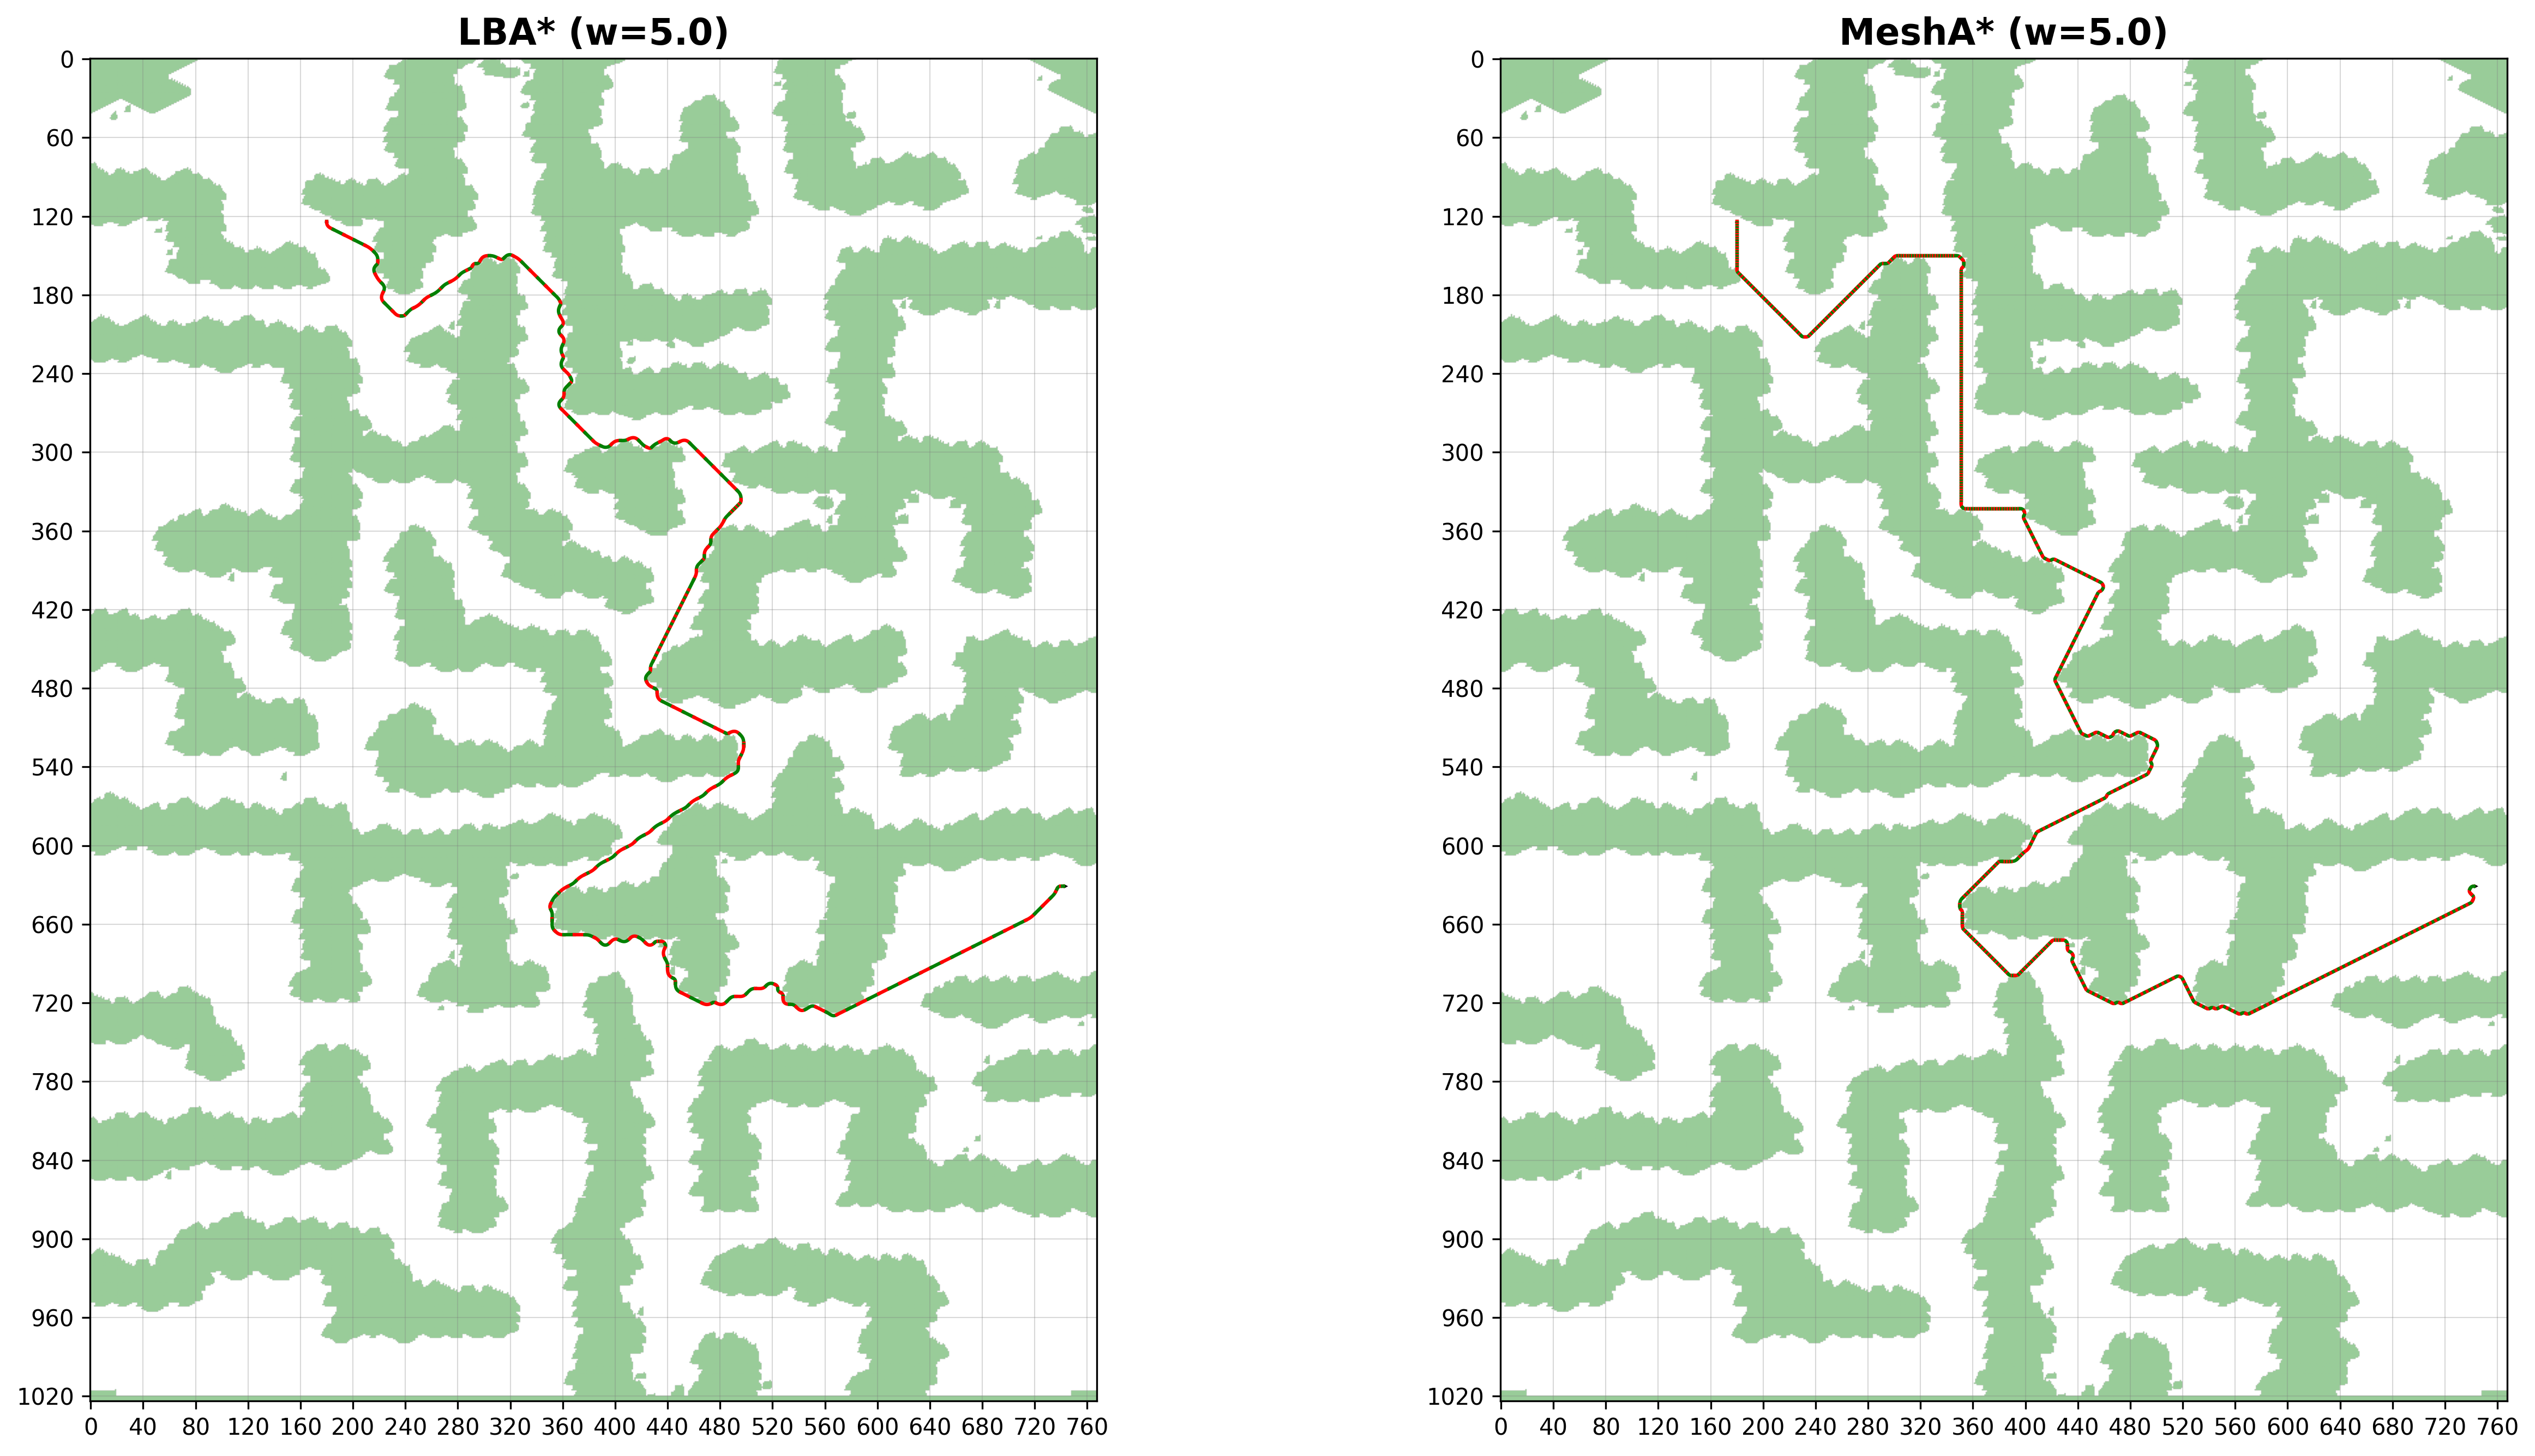

In [5]:
# === Case 3: LBA* vs MeshA* on Labyrinth ===
# Demonstrating behavior in a constrained environment with high weight.

# Labyrinth coordinates (approximate, ensure free cells)
L_START = (124, 180, 4)
L_GOAL  = (631, 742, 0)

results_lab = compile_and_run(
    map_file=MAP_LABYRINTH, 
    prim_file=PRIM_FILE, 
    mesh_file=MESH_FILE,
    start=L_START, 
    goal=L_GOAL, 
    out_prefix="res/nb_lab_", 
    weight=5.0
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), dpi=300)

# Left: LBA*
if "LBA*" in results_lab:
    parse_and_visualize(results_lab["LBA*"], PRIM_FILE, ax=ax1)
    ax1.set_title("LBA* (w=5.0)", fontsize=16, fontweight='bold')

# Right: MeshA*
if "MeshA*" in results_lab:
    parse_and_visualize(results_lab["MeshA*"], PRIM_FILE, ax=ax2)
    ax2.set_title("MeshA* (w=5.0)", fontsize=16, fontweight='bold')

plt.tight_layout()
# plt.savefig("../../images/side-by-side_Labyrinth.png", transparent=False, bbox_inches="tight", facecolor='white')
plt.show()

## Comprehensive Comparison (w=1 vs w=2)

In [10]:
# === Case 4: Impact of Heuristic Weight (Matrix View) ===
# Map: my_map (small)
# Rows: Weight (w=1 vs w=2)
# Cols: Algorithm (LBA* vs MeshA*)

START_C4 = (11, 26, 7)
GOAL_C4  = (29, 63, 10)

# We need two separate runs for different weights
res_w1 = compile_and_run(MAP_MY, PRIM_FILE, MESH_FILE, START_C4, GOAL_C4, "res/nb_c4_w1_", weight=1.0)
res_w2 = compile_and_run(MAP_MY, PRIM_FILE, MESH_FILE, START_C4, GOAL_C4, "res/nb_c4_w2_", weight=2.0)

fig, axes = plt.subplots(2, 2, figsize=(24, 16), dpi=500)

# --- Row 1: w = 1.0 ---
# LBA*
if "LBA*" in res_w1:
    parse_and_visualize(res_w1["LBA*"], PRIM_FILE, ax=axes[0, 0], fast_draw=False)
    axes[0, 0].set_title("LBA*, w=1", fontsize=14)

# MeshA*
if "MeshA*" in res_w1:
    parse_and_visualize(res_w1["MeshA*"], PRIM_FILE, ax=axes[0, 1], fast_draw=False)
    axes[0, 1].set_title("MeshA*, w=1", fontsize=14)

# --- Row 2: w = 2.0 ---
# LBA*
if "LBA*" in res_w2:
    parse_and_visualize(res_w2["LBA*"], PRIM_FILE, ax=axes[1, 0], fast_draw=False)
    axes[1, 0].set_title("LBA*, w=2", fontsize=14)

# MeshA*
if "MeshA*" in res_w2:
    parse_and_visualize(res_w2["MeshA*"], PRIM_FILE, ax=axes[1, 1], fast_draw=False)
    axes[1, 1].set_title("MeshA*, w=2", fontsize=14)

plt.tight_layout()
# plt.savefig("../../images/comparison_matrix.png", transparent=False, bbox_inches="tight", facecolor='white') 
plt.show()

🔨 Building C++ project...
🚀 Running planner...
🔨 Building C++ project...
🚀 Running planner...
